<a href="https://colab.research.google.com/github/MohammadErfanRashidi/Wine-Quality/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [305]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [306]:
# Uploading the dataset
dataset = pd.read_csv("/content/winequality-red.csv")

In [307]:
# Checking the head
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [308]:
# Checking the shape
dataset.shape

(1599, 12)

In [309]:
# Describing the dataset
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [310]:
# Checking for missing values
dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [311]:
# Counting the quality column
dataset["quality"].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [312]:
# Separating the data and the quality column
X = dataset.drop(columns="quality", axis=1)
Y = dataset["quality"]

In [313]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [314]:
print(Y)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [315]:
# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [316]:
# Printing the shape of train and test data
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [317]:
# Creating a scaler object
scaler = StandardScaler()

# Fitting the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transforming the test data using the fitted scaler
X_test = scaler.transform(X_test)

In [318]:
best_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
best_rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [319]:
# Creating a Random Forest Classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_classifier.fit(X_train, Y_train)

# Making predictions on the test set
Y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.678125


In [320]:
# Predicting a random input (THe result should be '6')
input_data = (11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8)     # Put a random input in the parenthesis
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the input_data
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

In [321]:
# Printing the prediction
prediction = best_rf_classifier.predict(input_data_reshaped)
print(prediction)

[6]


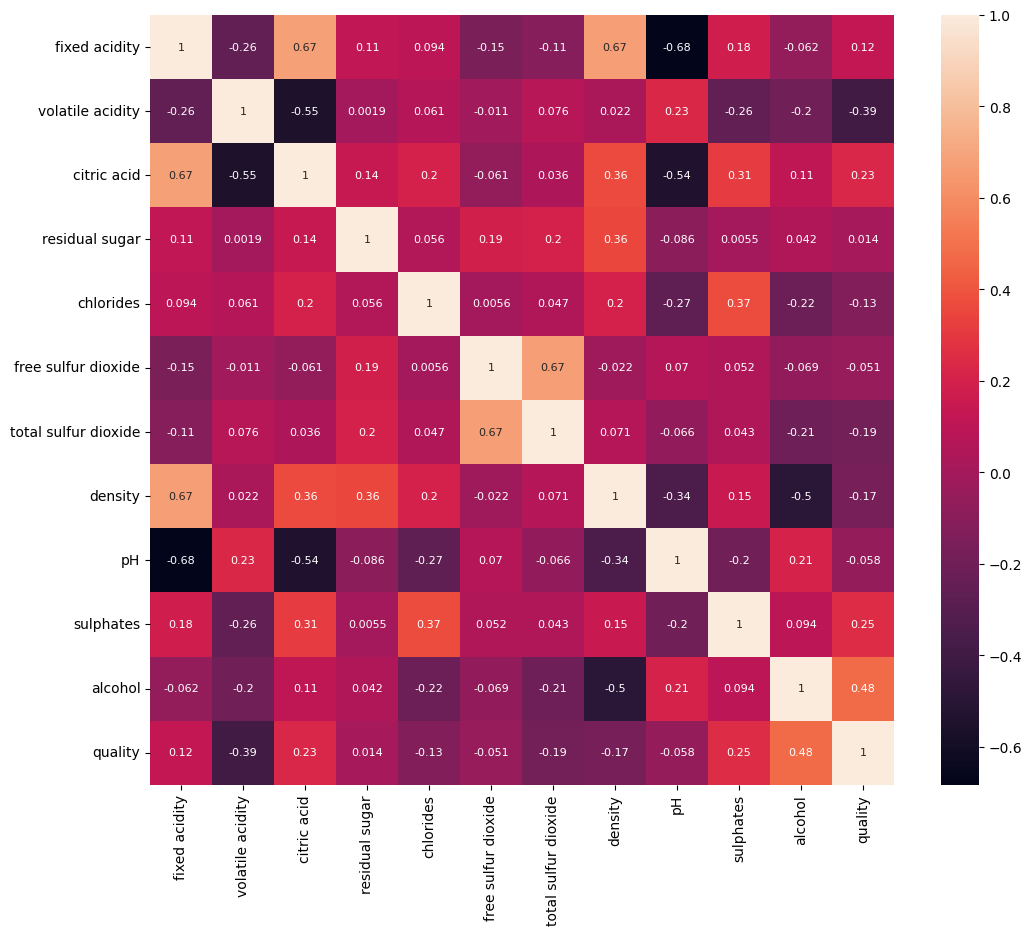

In [322]:
# Creating the heatmap
plt.figure(figsize=(12, 10))

sns.heatmap(dataset.corr(), annot=True, annot_kws={"size": 8})

plt.show()